# **Import Libraries**

In [1]:
## Importing Libraries

#Set seed
import random
random.seed(1234)

# Manipulating & Visualizing Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

# Statiscal methods
from scipy import stats

# Sampling Methods
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Model Selectioin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD

# Simple ML models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Performance metrics
import sklearn.metrics as skm

# **Load Dataset**

In [3]:
## Loading the dataset
df = pd.read_csv("/content/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [7]:
## Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,...,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,...,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,...,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,...,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,...,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,...,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


The following percentage breakdown confirms the note in the project description; indeed, we have a considerable class imbalance with the target variable. It stays consistent that most fraudulent activities are much less frequent than non-fraudulent. Before proceeding, we shall note it to avoid any overfitting issues when fitting the machine learning models.

In [8]:
## Target Variable Analysis
df['Class'].value_counts(normalize=True)

0.0    0.996311
1.0    0.003689
Name: Class, dtype: float64

**Note:** We did not have any information on the numerical predictors for privacy, given their transformation and standardization, excluding Amount & Time. In that regard, Amount presented itself as potentially most informative for the feature variable analysis. To better understand the variable's distribution, we had to transform it using a log scale.

count    23857.000000
mean        73.976583
std        212.761278
min          0.000000
25%          5.990000
50%         18.040000
75%         66.000000
max       7879.420000
Name: Amount, dtype: float64


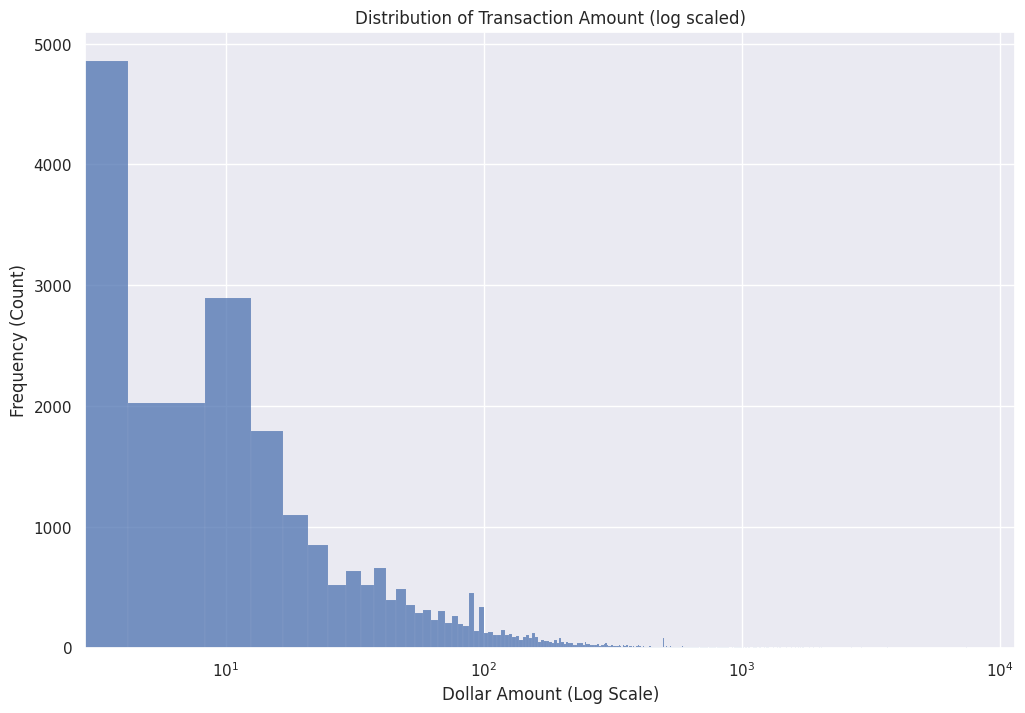

In [9]:
## Feature Variable Analysis

# Basic statistics
print(df['Amount'].describe())

# Distribution
sns.histplot(data=df, x='Amount').set(xscale="log")
plt.xlabel("Dollar Amount (Log Scale)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of Transaction Amount (log scaled)")
plt.show()

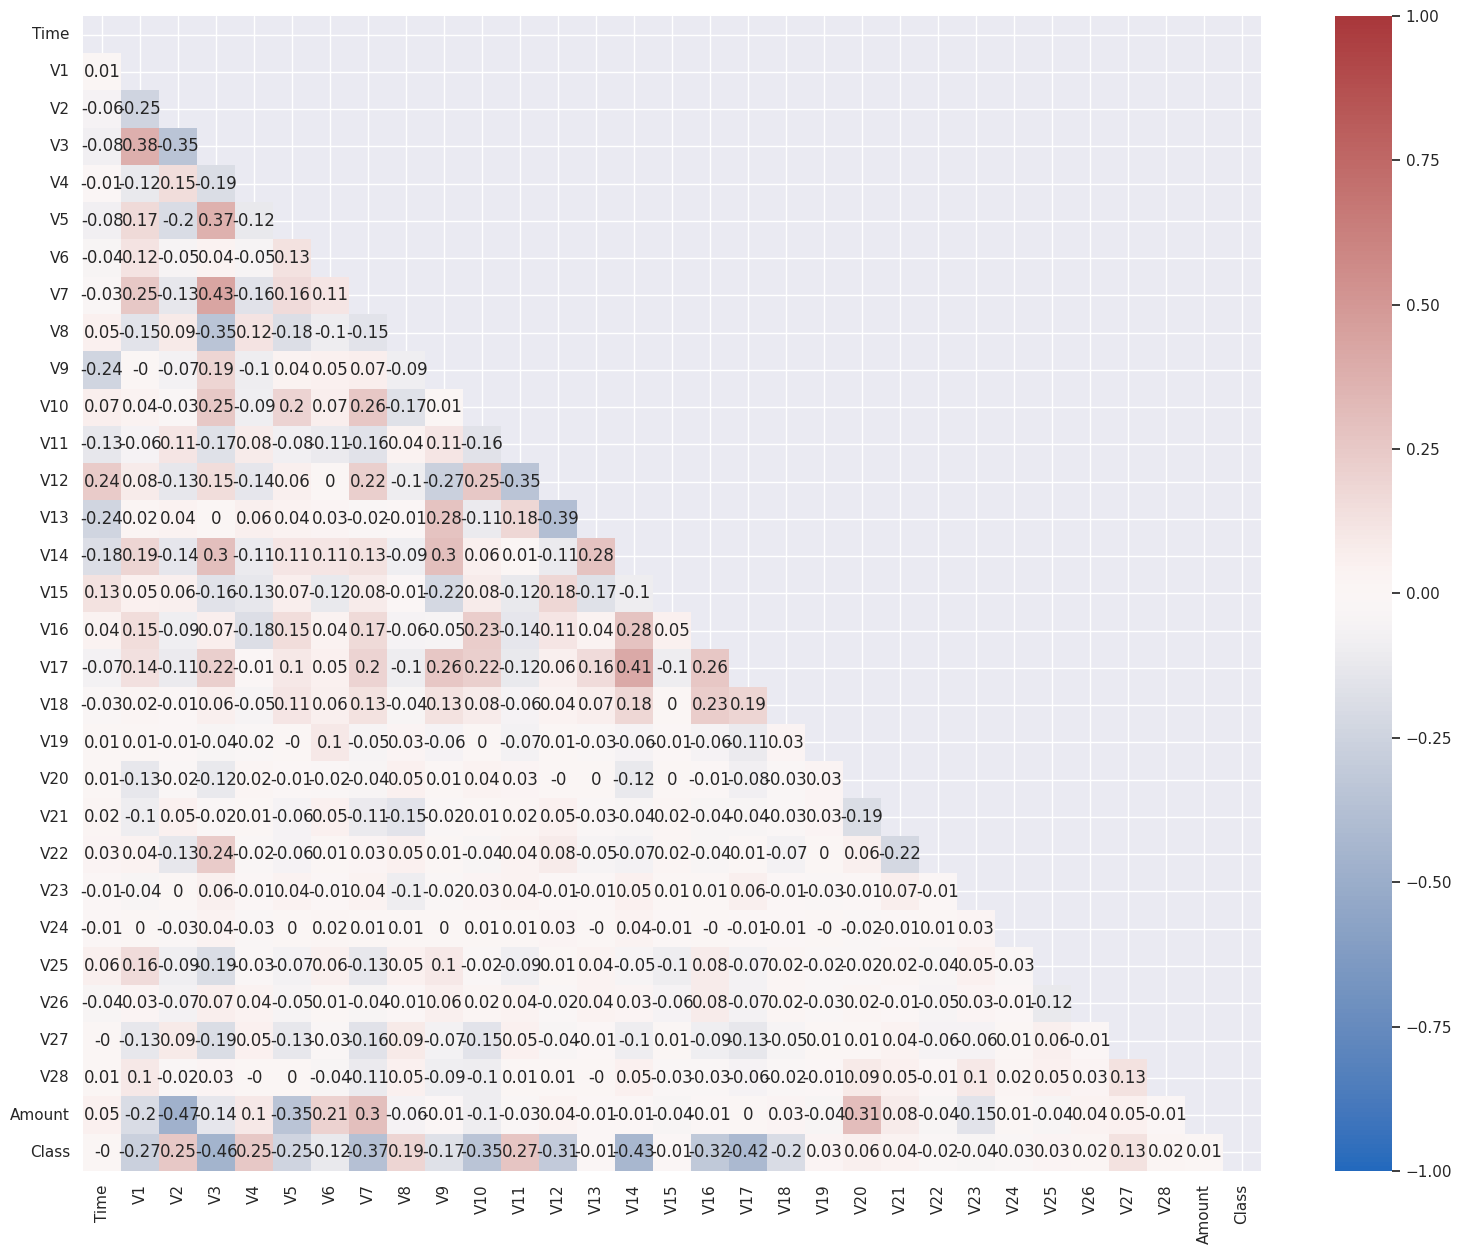

In [10]:
# Correlation Matrix
f = plt.figure(figsize=(19, 15))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1,
            center=0, cmap='vlag', mask=mask)
plt.show()

From the correlation matrix plotted, we can observe very few correlated variables as we would expect after the feature transformation. The two meaningful features, are Time and Amount, have some relative correlation with some variables with coefficients approximating 0.4. With such low values, it would be pretty challenging to imply a correlation between any of them with any certainty. It also indicates that there would be a very low incidence of any colinearity within our data

**Note:**  The code below filters those pairs with correlation coefficients above 0.5 as a threshold. As noted above, those values give very little to no confidence in any solid correlated relationship between variables as few crossing the 0.5 mark.

In [11]:
# Filtering those with some signigicant correlation coefficients
matrix = df.corr()
matrix = abs(matrix).unstack()
matrix = matrix[matrix.between(0.5, 1, inclusive='neither')]

print(matrix)

Series([], dtype: float64)


It appears that the V2 variable has a notable correlation to the Transaction Amount variable. Since most of them have been anonymized, we cannot make any further conclusion or analysis.

# **Data Processing**



In [12]:
## Simple processing steps
def basic_processing(data, col_drop, col_rename):
    """ Basic data processing: drop/rename columns, remove duplicate(s)

    Parameters
    ----------
    data : dataframe
        A dataset
    col_drop : list
        A list of column names to drop
    col_rename : dict
        A dictionary pairing the old and new column names desired

    Returns
    -------
    data
        a modified dataframe
    """
    #Drop the 'Serial No.' column
    if len(col_drop) > 0:
        data.drop(col_drop, axis=1, inplace=True)

    # Renaming the target variable and one predictor
    if col_rename:
        data.rename(columns=col_rename, inplace=True)

    # Removing any Duplicate Observations if any
    data.drop_duplicates(keep='first', inplace=True)
    return data

In [13]:
df = basic_processing(df, col_drop = [], col_rename = {"Class": "target"})
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
# Applying statistical imputation
def imputation_missing_val(data):
    """ Impute missing value using median and mode

    Parameters
    ----------
    data : dataframe
        A dataset

    Returns
    -------
    data
        an imputed dataframe
    """

    # Filter the columns with missing values
    null_cols = data.columns[data.isna().any()].tolist()

    for col in null_cols:
        # Impute using median for numeric columns
        if data[col].dtype.kind in 'iufc':
            data[col] = data[col].transform(lambda x: x.fillna(x.median()))

        # Impute using median for non-numeric columns
        else:
            data[col] = data[col].transform(lambda x: x.fillna(x.mode()))

    return data

In [15]:
# Identify missing values and dealing with them if present
def identify_missing_val(data):
    """ Identify missing/na values

    Parameters
    ----------
    data : dataframe
        A dataset

    Returns
    -------
    data
        a dataframe with no missing values
        either after imputation or original format
    """

    # Count number of missing values
    sum_nulls = data.isna().sum().sum()
    print("With %d null/na values in the dataset:" % sum_nulls)

    # Only visualize if missing values present
    if sum_nulls > 0:
        print("- We need to resolve this issue.")
        plt.figure(figsize=(10,6))
        sns.heatmap(df.isna().transpose(),
                    cmap="YlGnBu",
                    cbar_kws={'label': 'Missing Data'})
        plt.xlabel("Features")
        plt.ylabel("Observations")
        plt.show()

        # Proceeding in imputing the dataset with missing values
        data = imputation_missing_val(data)
        sum_nulls = data.isna().sum().sum()
        print("After imputation, we have missing {:d} values in our data." % sum_nulls)
    else:
        print("- No action needed")
        pass
    return data

With 9 null/na values in the dataset:
- We need to resolve this issue.


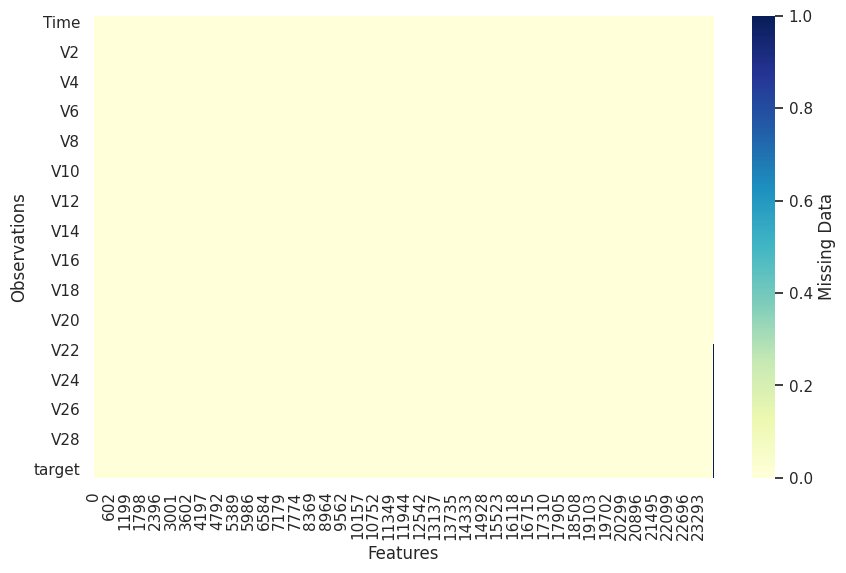

After imputation, we have missing {:d} values in our data.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [16]:
df = identify_missing_val(df)
df.head()

 We have no missing values given the pre-processing done prior.


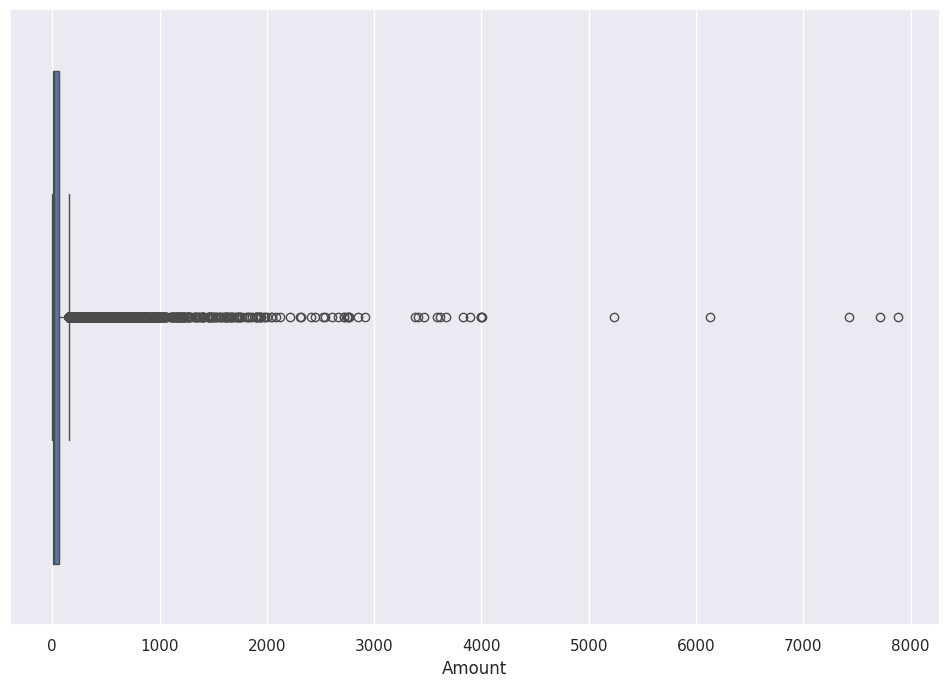

In [17]:
## Outliers
sns.boxplot(data=df, x='Amount')
plt.show()

From the boxplot below, we can observe a non-negligible number of outliers on the upper end of the distribution. It would denote transactions with high amounts in the order of thousands of dollars. We would assess the effect of this skewed distribution when building the predictive models in terms of feature transformation or selecting models robust to such feature types.


In [18]:
# Detecting outliers using z-score
def outliers_detection(data, threshold=3):
    """ Function to detect outliers

    Parameters
    ----------
    data : dataframe
        A dataset
    threshold:
        The threshold at which a value is an outlier
        ±2.5σ from the µ

    Returns
    -------
    data
        a dataframe with no missing values
        either after imputation or original format
    """
    print("At ±", threshold, "standard deviation from the mean:")
    for col in data.columns[:-1]:
        # Calculating the z-score for each predictor
        var = data[col]
        z = np.abs(stats.zscore(var))

        # Outlier
        pos = list(np.where(z > threshold)[0])
        no_of_outliers = len(pos)
        if no_of_outliers > 0:
            print("\t- ", col, "variable contains", no_of_outliers,  "outliers")
            if no_of_outliers < 10:
                outliers = list(var[pos])
                print(outliers)
            else:
                continue

        else:
            print("\t- No outliers detected for the", col, "variable")

In [ ]:
outliers_detection(df)

At ± 3 standard deviation from the mean:
	- No outliers detected for the Time variable
	-  V1 variable contains 3647 outliers
	-  V2 variable contains 4303 outliers
	-  V3 variable contains 1953 outliers
	-  V4 variable contains 3101 outliers
	-  V5 variable contains 2913 outliers
	-  V6 variable contains 4638 outliers
	-  V7 variable contains 3404 outliers
	-  V8 variable contains 4205 outliers
	-  V9 variable contains 2253 outliers
	-  V10 variable contains 3450 outliers
	-  V11 variable contains 661 outliers
	-  V12 variable contains 3446 outliers
	-  V13 variable contains 1189 outliers
	-  V14 variable contains 3378 outliers
	-  V15 variable contains 1252 outliers
	-  V16 variable contains 2085 outliers
	-  V17 variable contains 2520 outliers
	-  V18 variable contains 1669 outliers
	-  V19 variable contains 3395 outliers
	-  V20 variable contains 4594 outliers
	-  V21 variable contains 4096 outliers
	-  V22 variable contains 1212 outliers
	-  V23 variable contains 3356 outliers
	- 

As we thought about handling those outliers, we decided to keep them all since ggood data science practices advocates to conserve as many data points as possible. Thus, allowing us to limit the biases simply to produce a better fitting model or statistically significant results.

## **How does Amount's distribution behaves across the Fraud Class?**

In an attempt to answer the first question, we first split our dataset by target types; in other words, fraudulent and non-fraudulent transactions. We then plot the histogram side by side to observe any unusual behavior. In doing so, the non-fraud transactions were heavily right-skewed, making it quite challenging to compare the plots. To solve this issue, we used a logarithmic transformation, making it easier to see and thus, evaluate any similarities and differences.

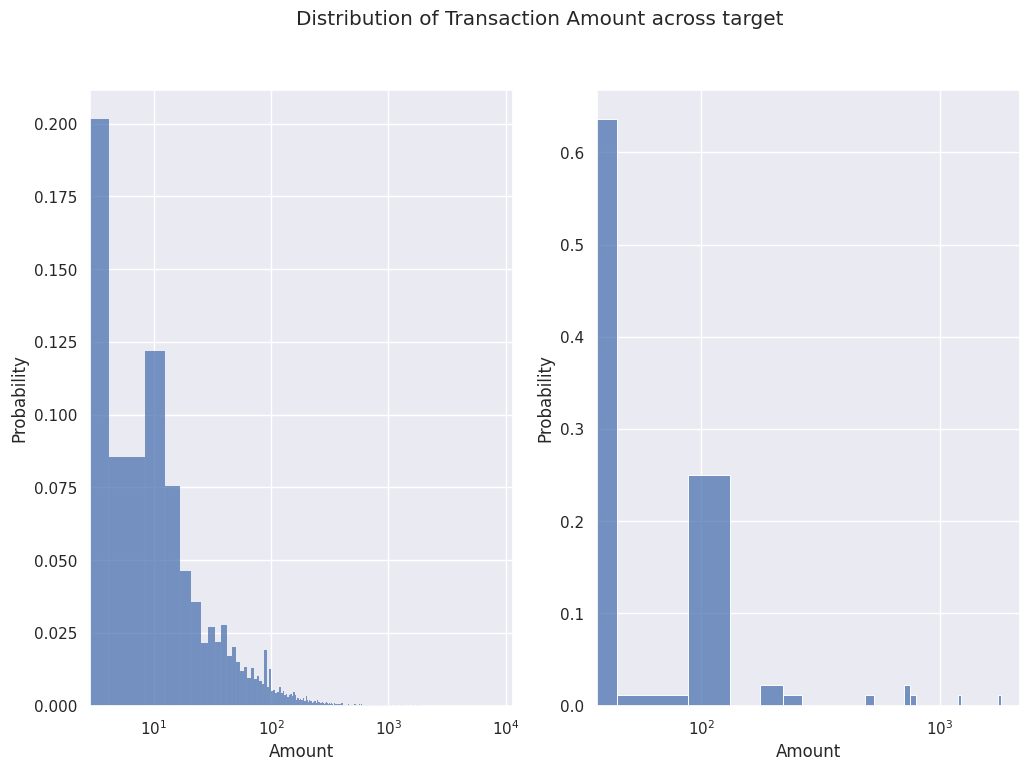

In [19]:
# Splitting data by fraud target
df_no_fraud = df[df['target'] == 0]
df_fraud = df[df['target'] == 1]

# Histogram for Amount Distribution per target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across target')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

Before making a note on the plots, we will first explain how to interpret logarithmic scales. In short, log scales show relative values rather than absolute ones. Indeed, 2 minus 1 would be displayed similarly to 9999 minus 9998, given that we are dealing with percentages here. In context, the histograms below would depict the order of growth of transaction value. Both distributions represent a similar trajectory, with most transactions on the lower end of the graph. It stays consistent with the mean value found at USD88, even with max values averaging USD20,000.

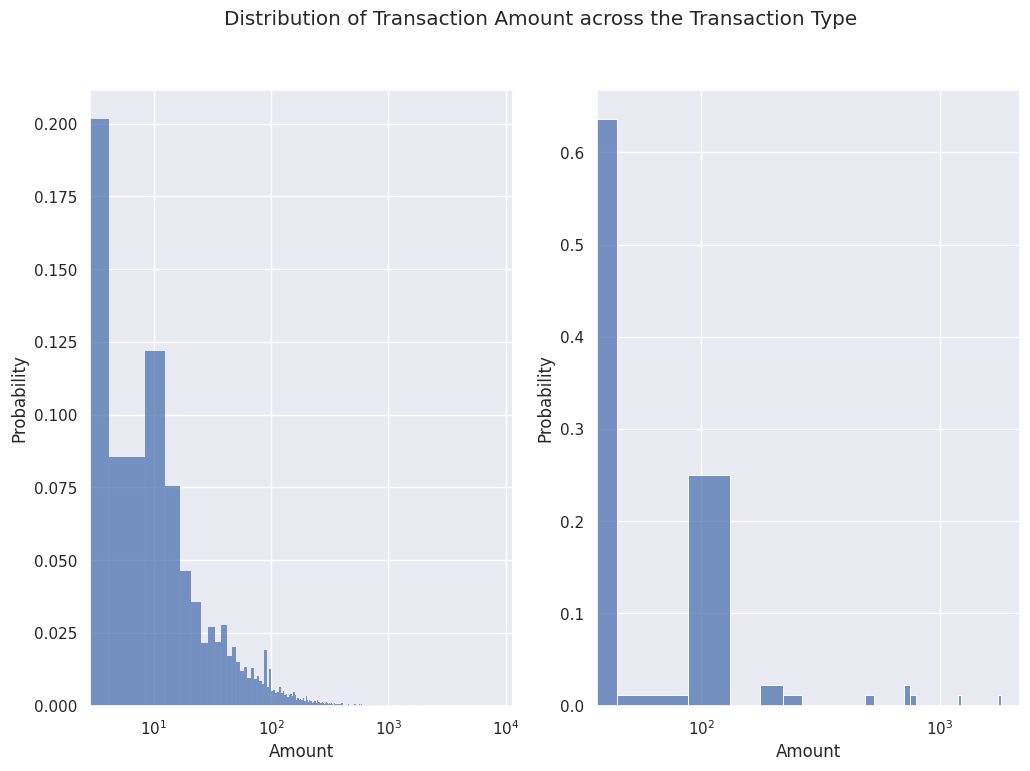

In [20]:
# Histogram for Amount Distribution per target after log transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across the Transaction Type')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

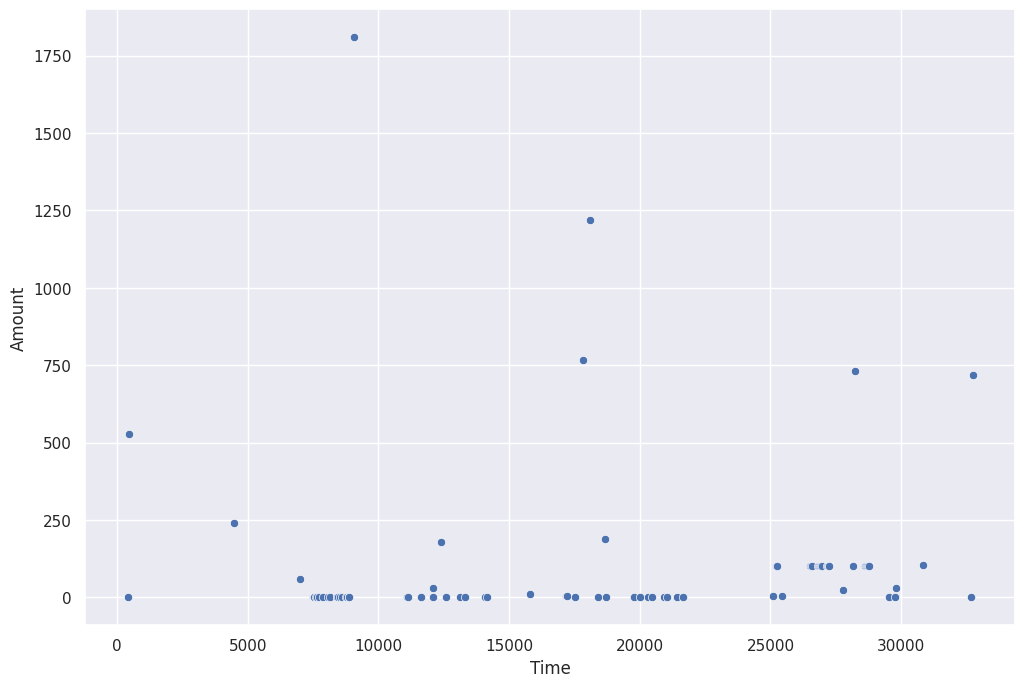

In [21]:
# Scatterplot
sns.scatterplot(data=df_fraud, x='Time', y='Amount')
plt.show()

The graph above does not appear that there is a clustering pattern on a time interval. So, we would assume that fraud occurred across time quite randomly.

In [24]:
def dimensionality_reduction(X, n=5,
                             dimred_methods={'PCA':PCA(),'SVD':TruncatedSVD()}):
    """ Deal with the multiple anonymized variables using dimensionality reduction

    Parameters
    ----------
    X: Array
        Feature(s)

    n: Discrete number
        Reduce the total number of features into n components

    dimred_methods: dictionary
        Key-pair values of dimensionality reduction methods

    Returns
    -------
    X, y
        Final Feature(s) and Target variables after dimensionality reduction
    """

    name, result = '', 0
    for method_name, method_func in dimred_methods.items():
        method_func.n_components = n
        method_func.fit_transform(X)
        exp_var = np.sum(method_func.explained_variance_ratio_)
        if exp_var > result:
            name = method_name
            result = exp_var
        else:
            continue
    final = dimred_methods[name]
    final.n_components = n

    return final.fit_transform(X)


In [25]:
X_red = dimensionality_reduction(X)

**Machine Learning set-up**

Under this section, we will explain the procedure of two main splitting approach to estimate our models' performance.

**Model Selection methods:**
* **Train_test_split**: Often denoted as the most popular by its simplicity, the train-test split is a sampling technique dividing the dataset between training and testing sets. In doing so, the goal would be to have enough (but not too much) in our training set used for the machine learning model to predict the observations in the testing set as accurately as possible. Most would opt for a 70/30 training-testing split, respectively, others 80/20, 60/40, or whichever else works best for the case scenario.

* **Cross-validation**: As the name would suggest, we will engage here in the process of validation to ensure reliability on our model. Cross-Validation is a statistical method applied in various ways to estimate the model's performance. Some examples are **Holdout Method, K-Fold, Stratified K-Fold, Leave-P-Out.**

In [26]:
def model_comparison(X, y, models):
    """ Function to split data into training and testing set

    Parameters
    ----------
    data : dataframe
        A dataset
    models: A dictionary
        A pre-defined dictionary with each model name and applicable function

    optional train_test params

    Returns
    -------
    models_df
        A dataframe with each model performance
    """
    # Obtain training and testing sets from function above
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # Craete dictionary to save performance data
    models_perf = {'Models': [], 'CV_mean': [], 'CV_std': []}

    # Obtain model performance across K-Fold using Cross-Validation
    for model in models:
        cv_results = cross_validate(model, X_train, y_train,
                                    cv=3, scoring='average_precision')
        n_scores = abs(cv_results['test_score'])
        models_perf['Models'].append(str(model))
        models_perf['CV_mean'].append(np.mean(n_scores))
        models_perf['CV_std'].append(np.std(n_scores))

    models_df = pd.DataFrame(models_perf, columns = ['Models', 'CV_mean', 'CV_std'])
    return models_df

# **Models**

This section will leverage the powerful sci-kit-learn package to build multiple models with little to no parameter tuning for comparison. We will only use the cross-validation error on our training dataset to avoid any data leakage.

* **Logistic Regression**  is a predictive targetifier that models an S-shaped curve (Sigmoid function) on the data to label the examples.

* **k-Nearest Neighbors**  is a machine learning model built on Euclidean distance that categorizes the observations.

* **Stochastic Gradient**  Descent is an iterative algorithm that minimizes the model's error rate.

* **A Decision Tree**  is a supervised machine learning algorithm building an actual tree based on splits within the data.

In [27]:
# List of simple ML models
models_simple = [LogisticRegression(max_iter=1000), KNeighborsClassifier(),
                 SGDClassifier(), DecisionTreeClassifier()]

# Model Comparison
model_comparison(X_red, y, models_simple)

,Models,CV_mean,CV_std
0,LogisticRegression(max_iter=1000),0.994035,0.001184
1,KNeighborsClassifier(),0.997523,0.000635
2,SGDClassifier(),0.933458,0.037728
3,DecisionTreeClassifier(),0.997637,0.001377


Our two best models are kNN and Decision Tree with both approximating 0.996 AUPRC.

## **Ensemble Methods**

This section will extend our work in machine learning to incorporate ensemble methods. We generated simple models and compared the scores, which appear satisfactory even for the lowest Average Precision Score. However, we may want more stability and minor variation in our predictive algorithm; it is where ensemble techniques come in. Most often, they act as a 'superposer' of multiple models throughout various ways and thus, bolster their predictive power.

* **Random Forest** builds onto the logic of decision trees by agglomerating multiple trees and obtaining a given prediction from majority voting; in other words, it is a Decision Tree times n (number of trees).

* **Stochastic Gradient Boosting**  is part of the more sophisticated ensemble techniques (Boosting), learning from previous models' errors and building a sequential improvement process.

* **XGBoost**: It stands for “Extreme Gradient Boosting” and is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

In [28]:
# List of ML ensemble models
models_ensemble = [RandomForestClassifier(),
                   BaggingClassifier(),
                   GradientBoostingClassifier(), ]

# Model Comparison
model_comparison(X_red, y, models_ensemble)

,Models,CV_mean,CV_std
0,RandomForestClassifier(),1.000000,0.000000
1,BaggingClassifier(),0.998984,0.000478
2,GradientBoostingClassifier(),0.999284,0.000671


In all three instances, the ensemble methods outperform the simple ML models going approximating 0.999 AUPRC.

In [29]:
# Data split & Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X_red, y)
final_clf = RandomForestClassifier()
final_clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Predicitions & Model Performance
y_pred = final_clf.predict(X_test)
auprc = skm.average_precision_score(y_test, y_pred)
# report performance
print('Final Model {} - AUPRC: {:.5f}' .format(final_clf, auprc))

Final Model RandomForestClassifier() - AUPRC: 0.99933


**Conclusion:** Given its simple implementation and recurrent high performance, we will present the Decision Tree Classifier as our final model.